In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import pandas as pd
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [7]:
import seaborn as sns

In [8]:
from avgn.dataset_names import species_dict

In [9]:
hopkins_dfs = list(DATA_DIR.glob('clusterability/convex_sample_indvs/*.pickle'))
hopkins_dfs[:3], len(hopkins_dfs)

([PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/clusterability/convex_sample_indvs/indvs_ s08.pickle'),
  PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/clusterability/convex_sample_indvs/indvs_ AGO.pickle'),
  PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/clusterability/convex_sample_indvs/katahira_white_munia_segmented_ WM35.pickle')],
 291)

In [10]:
clusterability_df = pd.concat([pd.read_pickle(i) for i in tqdm(hopkins_dfs)])

In [11]:
clusterability_df['species'] = [species_dict[ds]['species']  for ds in clusterability_df['dataset'].values]
clusterability_df['family'] = [species_dict[ds]['group']  for ds in clusterability_df['dataset'].values]

In [12]:
pd.set_option('display.max_rows', 100)

In [14]:
clusterability_df['single_indv'] = True
grouped_indvs = ['giant_otter', 'gibbon_morita_segmented']
clusterability_df.loc[clusterability_df.dataset.isin(grouped_indvs), 'single_indv'] = False

In [20]:
clusterability_df[:3]

,df,dataset,indv,umap_hopkins_1,umap_hopkins_10,nex,species,family,single_indv
0,/mnt/cube/tsainbur/Projects/github_repos/avgn_...,buckeye,s08,0.926159,0.939742,22728,Human (English),mammal,True
0,/mnt/cube/tsainbur/Projects/github_repos/avgn_...,BIRD_DB_Vireo_cassinii,AGO,0.987790,0.988549,4595,Cassin's vireo,songbird,True
0,/mnt/cube/tsainbur/Projects/github_repos/avgn_...,katahira_white_munia_segmented,WM35,0.981893,0.967158,2290,White-rumped munia,songbird,True


In [15]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [19]:
%%R -i clusterability_df
library('lme4')
glmer(data = clusterability_df)

R[write to console]: Loading required package: Matrix



function (formula, data = NULL, REML = TRUE, control = lmerControl(), 
    start = NULL, verbose = 0L, subset, weights, na.action, offset, 
    contrasts = NULL, devFunOnly = FALSE, ...) 
{
    mc <- mcout <- match.call()
    missCtrl <- missing(control)
    if (!missCtrl && !inherits(control, "lmerControl")) {
        if (!is.list(control)) 
            stop("'control' is not a list; use lmerControl()")
        warning("passing control as list is deprecated: please use lmerControl() instead", 
            immediate. = TRUE)
        control <- do.call(lmerControl, control)
    }
    if (!is.null(list(...)[["family"]])) {
        warning("calling lmer with 'family' is deprecated; please use glmer() instead")
        mc[[1]] <- quote(lme4::glmer)
        if (missCtrl) 
            mc$control <- glmerControl()
        return(eval(mc, parent.frame(1L)))
    }
    mc$control <- control
    mc[[1]] <- quote(lme4::lFormula)
    lmod <- eval(mc, parent.frame(1L))
    mcout$formula <- lmod$form

In [16]:
import pandas as pd
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})

R[write to console]: also installing the dependencies ‘processx’, ‘callr’, ‘withr’, ‘desc’, ‘pkgbuild’, ‘rprojroot’, ‘pkgload’, ‘praise’, ‘testthat’, ‘isoband’




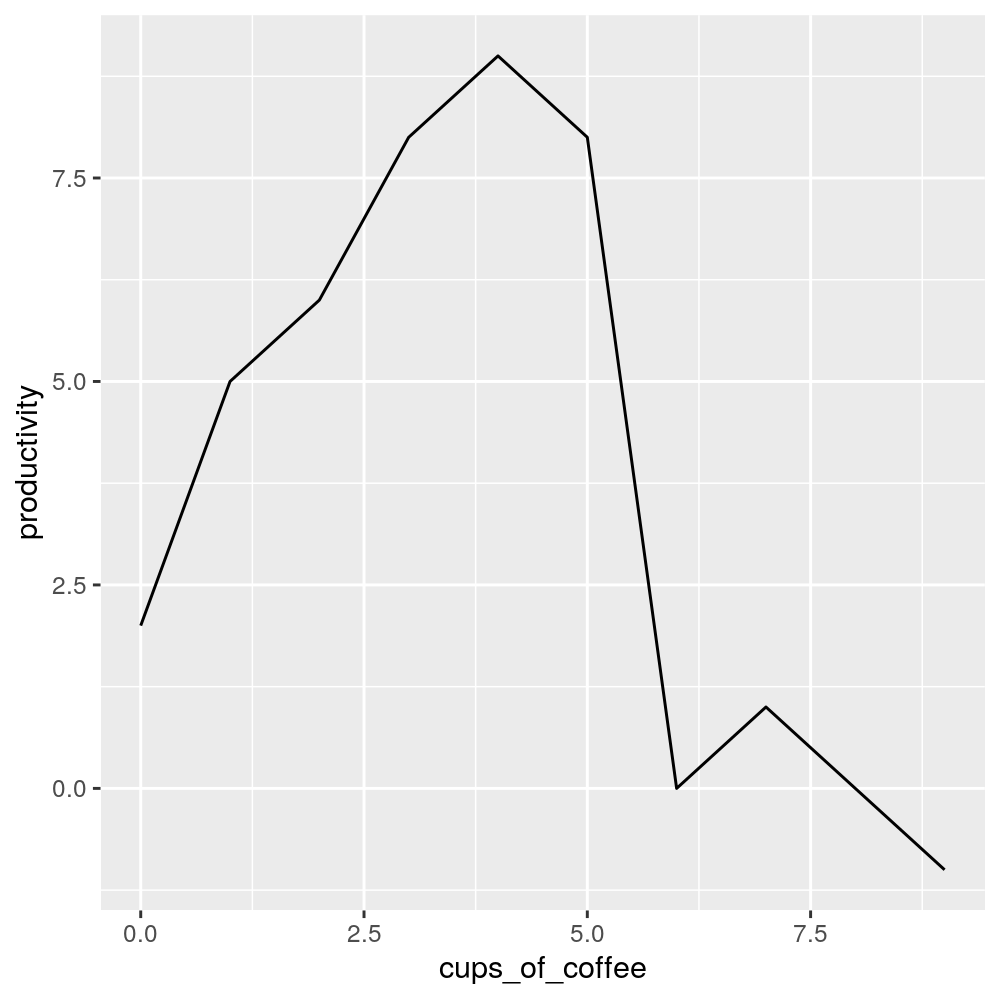

In [17]:
%%R -i df -w 5 -h 5 --units in -r 200
# import df from global environment
# make default figure size 5 by 5 inches with 200 dpi resolution

install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
ggplot(df, aes(x=cups_of_coffee, y=productivity)) + geom_line()

In [37]:
clusterability_df[:3]

,df,dataset,indv,umap_hopkins_1,umap_hopkins_10,nex,species,family,single_indv
0,/mnt/cube/tsainbur/Projects/github_repos/avgn_...,buckeye,s08,0.934546,0.938353,22728,Human (English),mammal,True
0,/mnt/cube/tsainbur/Projects/github_repos/avgn_...,BIRD_DB_Vireo_cassinii,AGO,0.989573,0.987860,4595,Cassin's vireo,songbird,True
0,/mnt/cube/tsainbur/Projects/github_repos/avgn_...,BIRD_DB_Vireo_cassinii,Mumford Bar Trail 2,0.976002,0.978320,555,Cassin's vireo,songbird,True


In [38]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [40]:
md = smf.ols(
    formula="umap_hopkins_10 ~ C(family)",
    groups=clusterability_df["species"],
    data=clusterability_df,
).fit()

In [41]:
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:        umap_hopkins_10   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     151.9
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           1.01e-28
Time:                        11:58:34   Log-Likelihood:                 394.29
No. Observations:                 315   AIC:                            -784.6
Df Residuals:                     313   BIC:                            -777.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.85

In [45]:
md = smf.ols(
    formula="umap_hopkins_10 ~ C(family) + (1 | C(species)*C(single_indv))",
    groups=clusterability_df["species"],
    data=clusterability_df,
).fit()

PatsyError: Error evaluating factor: AssertionError: 
    umap_hopkins_10 ~ C(family) + (nex | C(species)*C(single_indv))
                                   ^^^^^^^^^^^^^^^^

In [ ]:
clusterability ~ family + (exemplars | (species*single_indv))